# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the
Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn Workflow

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# 1. Get the data ready

heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (input data)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# To ignore warnings--Not Always Recommended
# import warnings
# warnings.filterwarnings('ignore')

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Make predictions using X_test (testing data)
y_preds = clf.predict(X_test)
y_preds


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.86      0.81      0.83        37

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[19,  5],
       [ 7, 30]], dtype=int64)

In [13]:
# 5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%')
    print()

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 85.25%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [14]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [15]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.819672131147541

## 1. Getting our data ready to be used with machine learning

Three main things we have to do: 

1. Split the data into features and labels (usually x and y)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [21]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
len(car_sales)

1000

In [23]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [24]:
# Split data into X and Y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [26]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [28]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']], dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [30]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as inputation).
2. Remove teh samples with missing data altogether.


In [32]:
# import car sales missing data
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: Fill missing data with Pandas

In [34]:
# Fill the "Make" column
car_sales_missing['Make'] = car_sales_missing['Make'].fillna('missing')

# Fill the "colour" column
car_sales_missing['Colour'] = car_sales_missing['Colour'].fillna('missing')

# Fill the "Odometer (KM)" column
car_sales_missing['Odometer (KM)'] = car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean())

# Fill the "Doors" column
car_sales_missing['Doors'] = car_sales_missing['Doors'].fillna(4)

In [35]:
# Check the DataFrame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [37]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
len(car_sales_missing)

950

In [39]:
# Create X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [40]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option2: Fill missing values with scikit-learn

Note: When preprocessing data, keep sets separate. 
Do not perform operations on entire dataset

In [41]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Drop the rows with no labels (Price)
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [44]:
# Split into X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [45]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical value with 'missing' and numercal values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features), 
                            ('door_imputer', door_imputer, door_features), 
                            ('num_imputer', num_imputer, num_features)
])

# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X



array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [46]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Color', 'Doors', 'Odometer(KM)'])
car_sales_filled.head()

,Make,Color,Doors,Odometer(KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [47]:
car_sales_filled.isna().sum()

Make            0
Color           0
Doors           0
Odometer(KM)    0
dtype: int64

In [48]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Color', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [49]:
# Now we've got our data as number and filled (no missing values)
# Now let's fit model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classifcation problem - predictiing a category (hear disease or not)
    - Sometimes you'll see 'clf' (short for classifier) used as classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking tor use Sklearn and not sure what mode ou should use, refer to the sklearn machine learning 
map: https://scikit-learn.org/stable/tutorial/machine_learning_map/

### 2.1 Picking a machine learning model for a regression problem

Let's use california housing dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [8]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
housing_df['Target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [12]:
housing_df.drop('MedHouseVal', axis=1, inplace=True)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
# import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('Target', axis=1)
y = housing_df['Target'] # Median house price in 100,000s

#  Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.5758549611440125

In [56]:
# try a different model
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('Target', axis=1)
y = housing_df['Target'] # Median house price in 100,000s

#  Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)


0.8040661003828089

## 2.2 Picking a machine learning model for a classification problem
Use map: https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [57]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Consulting the map and it says to try LinearSVC.

In [59]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup rand seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC Model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Check accuracy
clf.score(X_test, y_test)

0.8688524590163934

The above code did not work in video, so try using RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check accuracy
clf.score(X_test, y_test)

0.8289473684210527

Tidbit: 

1. If you have sructured data, use ensemble data
2. If you hve unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting hte model to the data

Different names for: 
* X = features, feature variables, data
* y = labels, targets, target variables

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Check accuracy (Use the patterns the model has learned)
clf.score(X_test, y_test)

0.8289473684210527

### 3.2 Make predictions using a machine learning model

2 ways to make predictions
1. predict()
2. predict_proba()

In [62]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [63]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [64]:
# Compare perdictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8289473684210527

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8289473684210527

Make predictions with `predict_proba()`

In [66]:
# predict_proba() returns probabilites of a classification label
clf.predict_proba(X_test[:5])

array([[0.91, 0.09],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.85, 0.15],
       [0.25, 0.75]])

In [67]:
# Let's predict() on the same data...
clf.predict(X_test[:10])

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [68]:
y_test[:10] 

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
Name: target, dtype: int64

`predict()` can also be used on regression models

In [69]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create model instance
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

y_preds = model.predict(X_test)


In [70]:
y_preds[:10]

array([0.49101  , 0.74017  , 4.8762069, 2.63051  , 2.31265  , 1.67475  ,
       2.40505  , 1.67855  , 2.56457  , 4.8542279])

In [71]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [72]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3288003433527133

In [73]:
housing_df['Target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [74]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=200)

# Fit classifier to training data
clf.fit(X_train, y_train)

# Check accuracy
clf.score(X_test, y_test)

0.8688524590163934

Let's use the `.score()` method on our regression problem...

In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X and y
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

# Create train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestRegressor()

# Fit classifier to training data
model.fit(X_train, y_train)

# Check accuracy
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [77]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=200)

# Fit classifier to training data
clf.fit(X_train, y_train)




RandomForestClassifier(n_estimators=200)

In [78]:
clf.score(X_test, y_test)

0.8688524590163934

In [79]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

In [80]:
np.random.seed(42)

# Single training and test split score 
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, 0.8281420765027322)

In [81]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.86885246, 0.78688525, 0.85      , 0.78333333])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [83]:
np.mean(cross_val_score)

0.8248087431693989

In [84]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve
  
ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr). 

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [85]:
# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [86]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [87]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [88]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

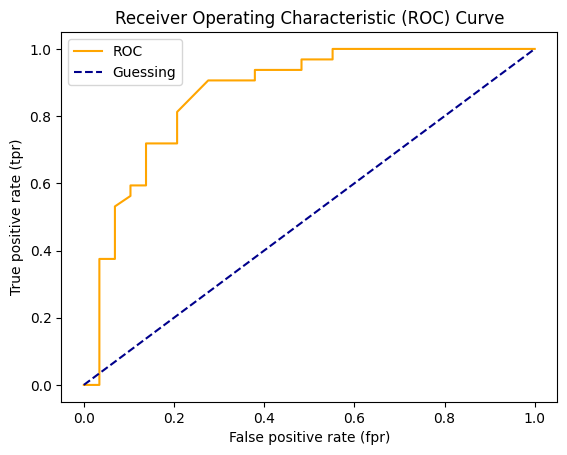

In [89]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots the ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [90]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

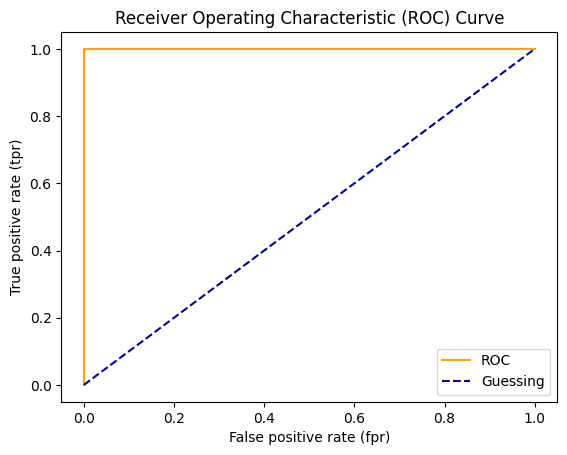

In [91]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [92]:
# Perfecdt AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused. 

In [93]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [94]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Label'], colnames=['Predicted labels'])

Predicted labels,0,1
Actual Label,,
0,23,6
1,6,26


<Axes: >

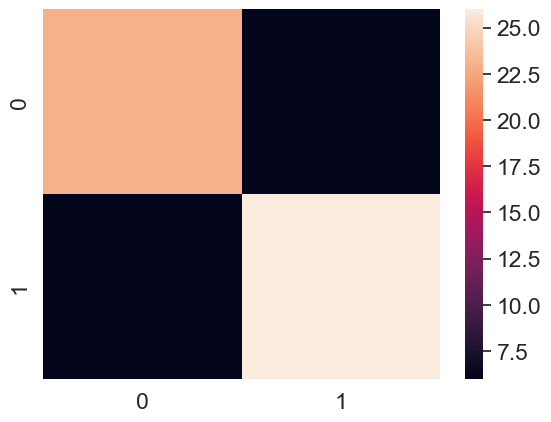

In [95]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

### Creating a confusion matrix using Scikit-Learn

To use the new mthods of creating a confusion with Sklearn version 1.0+

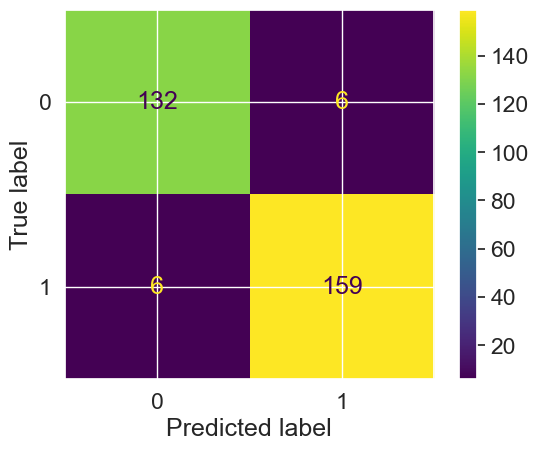

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

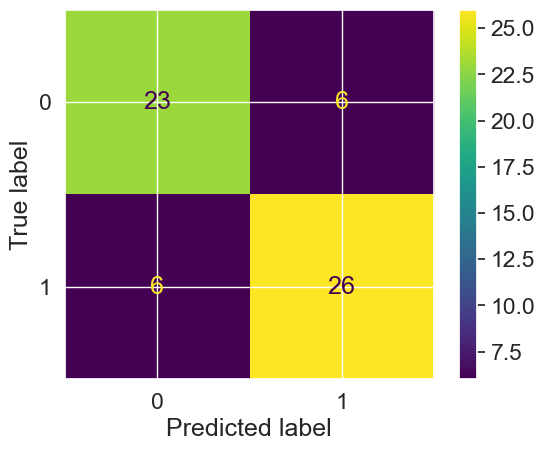

In [97]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

Classification Report

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [99]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case is 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

c:\Users\Hunter\ZTM_AI\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hunter\ZTM_AI\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hunter\ZTM_AI\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


For more on model evaluation: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [100]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('Target', axis=1)
y= housing_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [101]:
model.score(X_test, y_test)

0.8065734772187598

In [102]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [103]:
y_test.mean()

2.0550030959302323

In [104]:
from sklearn.metrics import r2_score

# Fill and array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:5]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [105]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [106]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. 

It gives you an idea of how wrong your model's predictions are.

In [107]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

0.32659871732073664

In [108]:
df = pd.DataFrame(data={'actual values': y_test, 'predicted values': y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [109]:
# MAE using formulas and differences
np.abs(df['differences']).mean()

0.32659871732073664

**Mean squared error (MSE)**

MSI is the mean of the square of the errors between actual and predicted values. 

In [110]:
# Mean squared error
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [111]:
df['differences^2'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,differences^2
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [112]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

0.2534678520824551

In [113]:
df_large_error = df.copy()
df_large_error.iloc[0]['differences^2'] = 16

C:\Users\Hunter\AppData\Local\Temp\ipykernel_22588\1522387756.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]['differences^2'] = 16


In [114]:
df_large_error.head()

,actual values,predicted values,differences,differences^2
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [115]:
# Calculate MSE with large error
df_large_error['differences^2'].mean()

0.2573437523766412

In [116]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,differences^2
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [117]:
df_large_error['differences^2'].mean()

0.7334180712088106

### 4.2.3 Finally using the `scoring` parameter

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [119]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default evaluation metric is used (Accuracy in this case)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [121]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [122]:
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [123]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [124]:
print(f'The cross-validated precision is: {np.mean(cv_precision)}')

The cross-validated precision is: 0.8329547346025924


In [125]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [126]:
print(f'The cross-validated recall is: {np.mean(cv_recall)}')

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being used for a regression problem

In [127]:
import imp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

model = RandomForestRegressor()

C:\Users\Hunter\AppData\Local\Temp\ipykernel_22588\2287464575.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [128]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [129]:
np.mean(cv_r2)

0.6545458023124507

In [130]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.4303784827892982

In [131]:
# Mean absolute erro 
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.46680736586240323

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module: https://scikit-learn.org/stable/api/sklearn.metrics.html

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Evaluate model using evaluation functions
y_preds = clf.predict(X_test)
print('The Heart Disease prediction model has the following evaluation metrics: ')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1 Score: {f1_score(y_test, y_preds)}')

The Heart Disease prediction model has the following evaluation metrics: 
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384616


In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = housing_df.drop('Target', axis=1)
y = housing_df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Evaluate model using evaluation metrics
y_preds = model.predict(X_test)
print('The housing price estimator has the following evaluation metrics:')
print(f'R2 Score: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

The housing price estimator has the following evaluation metrics:
R2 Score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


**Getting evauation metrics on cross-validation data is more meaningful**

## 5. Improving a model

First predictions = baseline predictions. 
First model = baseline model.

**From a data perspective:** 
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

**From a model perspective:** 
* Is there a better model?
* Could we improve the current model? (tune hyperparameters)

**Parameters vs Hyperparameters:**
* Parameters = model find these patterns in data
* Hyperparameters = settings ona model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters:** 
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = RandomForestClassifier()

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation, and test.

In [15]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust: 
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [41]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels. 

    Args:
        y_true (ArrayLike): True target values
        y_preds (_type_): Predicted target values
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': np.round(accuracy, 4),'precision': np.round(precision, 4), 'recall': np.round(recall, 4), 'f1': np.round(f1, 4) }
    print(f'ACC: {metric_dict["accuracy"]*100}%')
    print(f'Precision: {metric_dict["precision"]}')
    print(f'Recall: {metric_dict["recall"]}')
    print(f'F1 Score: {metric_dict["f1"]}')
    return metric_dict

In [42]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)


ACC: 80.0%
Precision: 0.7667
Recall: 0.92
F1 Score: 0.8364


In [43]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds = clf_2.predict(X_valid)

# Evaluate the classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds)

ACC: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


In [44]:
clf_3 = RandomForestClassifier(n_estimators=100, 
                               max_depth=10)
clf_3.fit(X_train, y_train)

y_preds = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds)

ACC: 82.22%
Precision: 0.8148
Recall: 0.88
F1 Score: 0.8462


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV


grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200], 
        'max_depth': [None, 5, 10, 20, 30], 
        'max_features': ['log2', 'sqrt'], 
        'min_samples_split': [2, 4, 6], 
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=50, # number of models to try
                            cv =5,
                            verbose=2)

# Fit the RandomizedSearchCV model
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [52]:
rs_clf.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       min_samples_split=6, n_jobs=1)

In [53]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [54]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

ACC: 81.97%
Precision: 0.7576
Recall: 0.8929
F1 Score: 0.8197


### 5.3 Hyperparameter tuning with GridSearchCV

In [55]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [56]:
grid_2 = {'n_estimators': [ 100, 200, 500],
        'max_depth': [None],
        'max_features': ['log2', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [58]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                            param_grid=grid_2, 
                            cv =5,
                            verbose=2
                        )

# Fit the RandomizedSearchCV model
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [59]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [60]:
# Use model to predict 
gs_y_preds = gs_clf.predict(X_test)

# Get evaluation metrics
gs_metrics = evaluate_preds(y_test, gs_y_preds)

ACC: 78.69%
Precision: 0.7419
Recall: 0.8214
F1 Score: 0.7797


Let's compare our different model's metrics.

<Axes: >

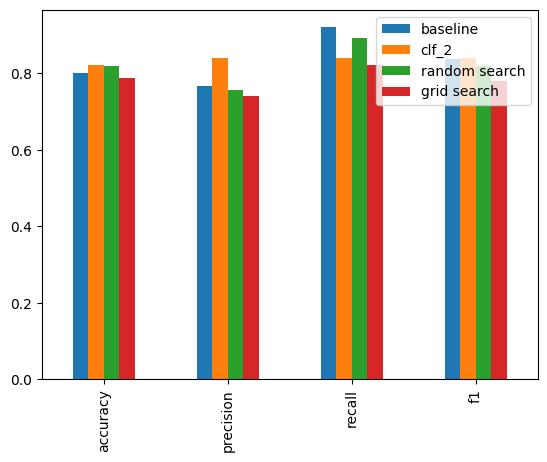

In [64]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})

compare_metrics.plot.bar()

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [65]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model1.pkl', 'wb'))

In [66]:
# Load a save model
loaded_pickle_model = pickle.load(open('gs_random_forest_model1.pkl', 'rb'))

In [68]:
# Make some predictions with loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

ACC: 78.69%
Precision: 0.7419
Recall: 0.8214
F1 Score: 0.7797


{'accuracy': 0.7869, 'precision': 0.7419, 'recall': 0.8214, 'f1': 0.7797}

**Joblib** (preferred-less code and more efficient)

In [69]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename='gs_random_forest_model1.joblib')

['gs_random_forest_model1.joblib']

In [70]:
# Import a save joblib model
loaded_job_model = load(filename='gs_random_forest_model1.joblib')

In [71]:
joblib_y_preds = loaded_job_model.predict(X_test)

In [72]:
evaluate_preds(y_test, joblib_y_preds)

ACC: 78.69%
Precision: 0.7419
Recall: 0.8214
F1 Score: 0.7797


{'accuracy': 0.7869, 'precision': 0.7419, 'recall': 0.8214, 'f1': 0.7797}

## 7. Putting all together

In [73]:
data = pd.read_csv('../data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [74]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [75]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert the data to numbers
3. Build a model on the data

In [92]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('../data/car-sales-extended-missing-data.csv')
data.dropna(subset='Price', inplace=True)

# Define different features and transformer pipline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))           
])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))
                                      ])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('door', door_transformer, door_feature),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Creating a preprocessing and modelling pipline
model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('model', RandomForestRegressor())])

# Split data 
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [96]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5], 
    'model__max_features': ['log2'],
    'model__min_samples_split': [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=log2, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [97]:
gs_model.score(X_test, y_test)

0.29547725991910845